In [1]:
import numpy as np
from scipy.stats import norm
import scipy
import matplotlib.pyplot as plt

In [59]:
N=1000

In [29]:
def transition_prob(i,j,N):
    if j == i+1:
        return ((N-i)*(N-i-1)*(N-i-2))/((N)*(N-1)*(N-2))
    if j == i-1:
        return ((N-i)*(i)*(i-1))/((N)*(N-1)*(N-2))
    if j == i:
        return i/N + (2*(N-i)*(i)*(N-i-1))/((N)*(N-1)*(N-2))
    else:
        return 0

In [73]:
M = np.array([[transition_prob(i,j,N) for j in range(1,N-1)] for i in range(1, N-1)])

In [93]:
M

array([[3.00000000e-02, 9.70000000e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.02020202e-04, 5.91919192e-02, 9.40606061e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.99876314e-04, 8.75881262e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.62374768e-01, 2.47371676e-05, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.87940631e-02, 9.71199753e-01, 6.18429190e-06],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.95959596e-02, 9.80404040e-01]])

In [3]:
def transition_prob_2(i,j,N):
    if j == i+2:
        return ((N-i)*(N-i-1)*(N-i-2)*(N-i-3))/((N)*(N-1)*(N-2)*(N-3))
    if j == i+1:
        return 4*((N-i)*(N-i-1)*(N-i-2)*(i))/((N)*(N-1)*(N-2)*(N-3))
    if j == i-1:
        return 2*((N-i)*(i)*(i-1)*(i-2))/((N)*(N-1)*(N-2)*(N-3))
    if j == i:
        return ((i)*(i-1))/(N*(N-1)) + 5*((N-i)*(N-i-1)*(i)*(i-1))/((N)*(N-1)*(N-2)*(N-3))
    else:
        return 0

In [46]:
N=10

In [61]:
M = np.array([[transition_prob_2(i,j,N) for j in range(2,N-1)] for i in range(2, N-1)])

In [26]:
M

array([[0.4       , 0.53333333, 0.06666667],
       [0.1       , 0.7       , 0.2       ],
       [0.        , 0.26666667, 0.73333333]])

In [74]:
e_values, e_vectors = np.linalg.eig(np.transpose(M))
#dist = np.where(e_values == 1)

In [75]:
np.where(1 - e_values <= 0.00000000000001)

(array([397], dtype=int64),)

In [44]:
e_values[59]

(1.000000000000002+0j)

In [64]:
e_vectors = np.where(np.iscomplex(e_vectors) == True, 0, e_vectors)

In [34]:
np.transpose(e_vectors)[56]

array([-1.58413280e-20+0.j, -4.40066275e-19+0.j, -2.59977615e-18+0.j,
        5.89282593e-17+0.j,  6.91973751e-16+0.j,  8.52293280e-16+0.j,
        1.24702596e-15+0.j,  9.99180632e-16+0.j,  7.12338664e-16+0.j,
        2.74709679e-16+0.j, -2.87708560e-16+0.j, -8.86198694e-16+0.j,
       -1.58997976e-15+0.j, -2.18164548e-15+0.j, -2.74059735e-15+0.j,
       -3.09849987e-15+0.j, -3.32901335e-15+0.j, -3.50352333e-15+0.j,
       -3.36671011e-15+0.j, -3.28741694e-15+0.j, -3.03263887e-15+0.j,
       -4.64450008e-15+0.j, -2.86228854e-14+0.j, -2.80172486e-13+0.j,
       -2.61307270e-12+0.j, -2.20010758e-11+0.j, -1.66973870e-10+0.j,
       -1.14473433e-09+0.j, -7.10523898e-09+0.j, -4.00098360e-08+0.j,
       -2.04781516e-07+0.j, -9.54339655e-07+0.j, -4.05594352e-06+0.j,
       -1.57429893e-05+0.j, -5.58809974e-05+0.j, -1.81613242e-04+0.j,
       -5.41022029e-04+0.j, -1.47876789e-03+0.j, -3.71188702e-03+0.j,
       -8.56351370e-03+0.j, -1.81713583e-02+0.j, -3.54879664e-02+0.j,
       -6.38233194e-

In [76]:
a = np.round(np.transpose(e_vectors)[397], decimals=14)

In [77]:
a = a/sum(a)

C:\Users\konst\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


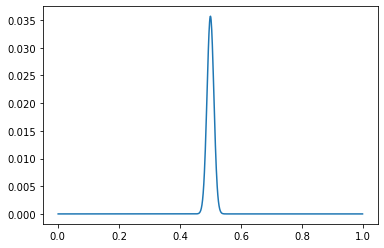

In [78]:
plt.plot([i/N for i in range(1,N-1)], a)

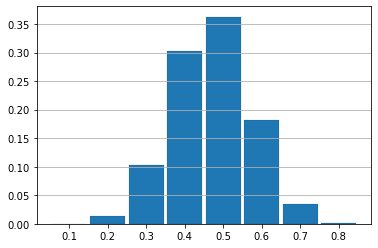

In [58]:
x = [i/N for i in range(1,N-1)]
#my_xticks = [0.1*i for i in range(10)]


fig, ax = plt.subplots(facecolor='white')                                    # create figure and axes objects
plt.bar(x, a, width=0.09, linewidth=0.1, edgecolor="black", label="Gewichte")
#fig.set_size_inches(4, 3)# make plot
#ax.set_xticks(x)                 
#ax.set_xlim([0.4,0.8])# set x tick positions
#ax.set_xticklabels(my_xticks)                                                # set the corresponding x tick labels
ax.grid(axis='y')

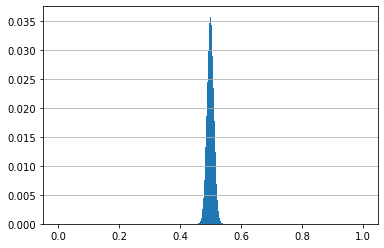

In [88]:
x = [i/N for i in range(1,N-1)]
my_xticks = [0.1*i for i in range(10)]


fig, ax = plt.subplots(facecolor='white')                                    # create figure and axes objects
plt.bar(x, a, width=0.001, linewidth=0, edgecolor="black", label="Gewichte")
#fig.set_size_inches(4, 3)# make plot
#ax.set_xticks(my_xticks)                 
#ax.set_xlim([0.425,0.575])# set x tick positions
#ax.set_xticklabels(my_xticks)                                                # set the corresponding x tick labels
ax.grid(axis='y')

C:\Users\konst\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


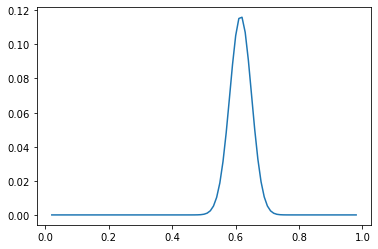

In [16]:
b = np.transpose(e_vectors)[59]
b = b/sum(b)
plt.plot([i/N for i in range(2,N-1)], b)

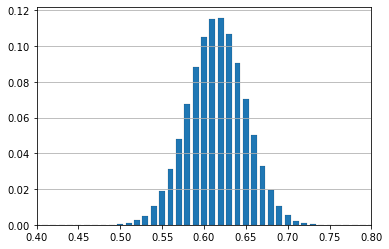

In [28]:
x = [i/N for i in range(2,N-1)]
#my_xticks = [0.1*i for i in range(10)]


fig, ax = plt.subplots(facecolor='white')                                    # create figure and axes objects
plt.bar(x, b, width=0.007, linewidth=0.1, edgecolor="black", label="Gewichte")
#fig.set_size_inches(4, 3)# make plot
#ax.set_xticks(x)                 
ax.set_xlim([0.4,0.8])# set x tick positions
#ax.set_xticklabels(my_xticks)                                                # set the corresponding x tick labels
ax.grid(axis='y')

In [56]:
b[60]

(0.11590034341772273-0j)

In [155]:
np.std(b)

0.004928384469918001

In [157]:
norm.pdf(x, 0.5, np.std(b))

0.24197072451914337

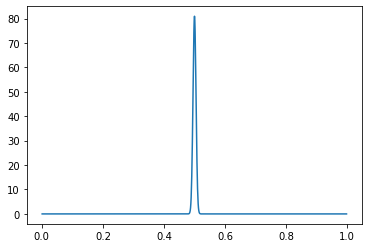

In [158]:
x = [i/N for i in range(1,N-1)]
plt.plot(x, norm.pdf(x, 0.5, np.std(b)))

In [48]:
np.iscomplex(e_values[0])

False

In [73]:
e_values[56]

(0.999999999999998+0j)

In [74]:
dist = np.transpose(e_vectors)[56]
#dist = dist/sum(dist)
dist

array([-1.58413280e-20+0.j, -4.40066275e-19+0.j, -2.59977615e-18+0.j,
        5.89282593e-17+0.j,  6.91973751e-16+0.j,  8.52293280e-16+0.j,
        1.24702596e-15+0.j,  9.99180632e-16+0.j,  7.12338664e-16+0.j,
        2.74709679e-16+0.j, -2.87708560e-16+0.j, -8.86198694e-16+0.j,
       -1.58997976e-15+0.j, -2.18164548e-15+0.j, -2.74059735e-15+0.j,
       -3.09849987e-15+0.j, -3.32901335e-15+0.j, -3.50352333e-15+0.j,
       -3.36671011e-15+0.j, -3.28741694e-15+0.j, -3.03263887e-15+0.j,
       -4.64450008e-15+0.j, -2.86228854e-14+0.j, -2.80172486e-13+0.j,
       -2.61307270e-12+0.j, -2.20010758e-11+0.j, -1.66973870e-10+0.j,
       -1.14473433e-09+0.j, -7.10523898e-09+0.j, -4.00098360e-08+0.j,
       -2.04781516e-07+0.j, -9.54339655e-07+0.j, -4.05594352e-06+0.j,
       -1.57429893e-05+0.j, -5.58809974e-05+0.j, -1.81613242e-04+0.j,
       -5.41022029e-04+0.j, -1.47876789e-03+0.j, -3.71188702e-03+0.j,
       -8.56351370e-03+0.j, -1.81713583e-02+0.j, -3.54879664e-02+0.j,
       -6.38233194e-

In [68]:
sum(dist)

0.9999999999999999

# Stat. Vert. Größe Klasse 2

In [3]:
def transition_prob_relevant_class(i,j,N):
    if j == i+1:
        return ((N-i-1)*(N-i-2))/((N)*(N-1)*(N-2))
    if j == i-1:
        return ((i)*(i))/((N)*(N-1)) + ((i)*(i-1))/((N)*(N-1)*(N-2))
    if j == i:
        return 1 - ((N-i-1)*(N-i-2))/((N)*(N-1)*(N-2)) - ((i)*(i))/((N)*(N-1)) + ((i)*(i-1))/((N)*(N-1)*(N-2))
    else:
        return 0

In [48]:
N=10
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

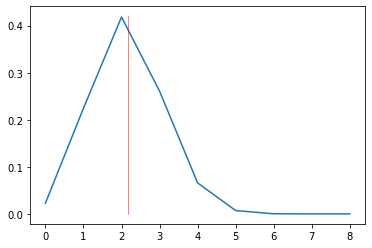

In [49]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot([i for i in range(N-1)], a)
plt.plot([np.sqrt(N)-1, np.sqrt(N)-1], [0, 0.42], color="r", linewidth=0.5)

In [51]:
expected_value = np.dot(a, np.arange(N-2))
variance = np.dot(a, np.square(np.arange(N-2))) - expected_value**2
print("equilibrium_point = " + str(np.sqrt(N)-1))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

equilibrium_point = 2.1622776601683795
expected_value = 2.14541496936964
variance = 0.8888536037914232


In [51]:
N=100
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

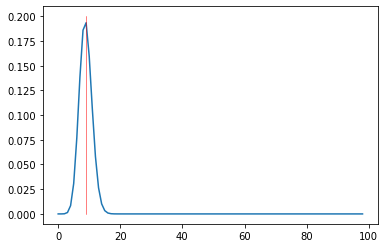

In [52]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot([i for i in range(N-1)], a)
plt.plot([np.sqrt(N)-1, np.sqrt(N)-1], [0, 0.2], color="r", linewidth=0.5)

In [53]:
expected_value = np.dot(a, np.arange(N-1))
variance = np.dot(a, np.square(np.arange(N-1))) - expected_value**2
print("equilibrium_point = " + str(np.sqrt(N)-1))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

equilibrium_point = 9.0
expected_value = 8.864431615103761
variance = 4.141326180095632


In [54]:
N=1000
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

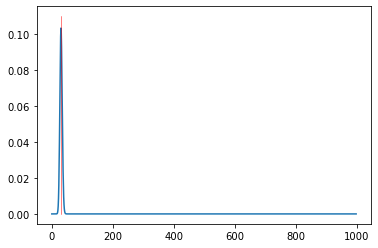

In [56]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot([i for i in range(N-1)], a)
plt.plot([np.sqrt(N)-1, np.sqrt(N)-1], [0, 0.11], color="r", linewidth=0.5)

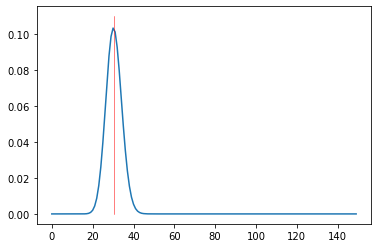

In [57]:
plt.plot([i for i in range(150)], a[:150])
plt.plot([np.sqrt(N)-1, np.sqrt(N)-1], [0, 0.11], color="r", linewidth=0.5)

In [58]:
expected_value = np.dot(a, np.arange(N-1))
variance = np.dot(a, np.square(np.arange(N-1))) - expected_value**2
print("equilibrium_point = " + str(np.sqrt(N)-1))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

equilibrium_point = 30.622776601683793
expected_value = 30.41548869165639
variance = 14.863168198112476


In [59]:
N=2000
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

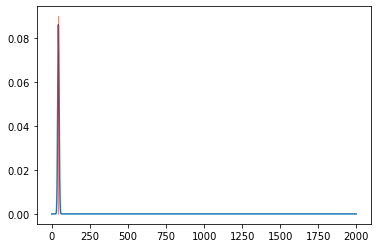

In [60]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot([i for i in range(N-1)], a)
plt.plot([np.sqrt(N)-1, np.sqrt(N)-1], [0, 0.09], color="r", linewidth=0.5)

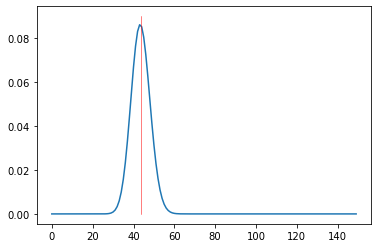

In [61]:
plt.plot([i for i in range(150)], a[:150])
plt.plot([np.sqrt(N)-1, np.sqrt(N)-1], [0, 0.09], color="r", linewidth=0.5)

In [62]:
expected_value = np.dot(a, np.arange(N-1))
variance = np.dot(a, np.square(np.arange(N-1))) - expected_value**2
print("equilibrium_point = " + str(np.sqrt(N)-1))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

equilibrium_point = 43.721359549995796
expected_value = 43.50229573995848
variance = 21.398090912617363


### Now scaled down with sqrt(N)

In [63]:
N=10
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

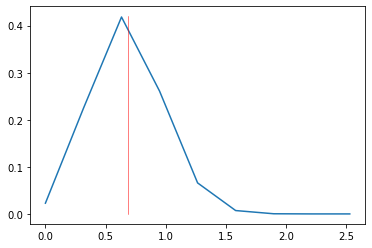

In [64]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot(np.arange(N-1)/np.sqrt(N), a)
plt.plot([1 - 1/np.sqrt(N), 1 - 1/np.sqrt(N)], [0, 0.42], color="r", linewidth=0.5)

In [65]:
expected_value = np.dot(a, np.arange(N-1)/np.sqrt(N))
variance = np.dot(a, np.square((np.arange(N-1)/np.sqrt(N)))) - expected_value**2
print("scaled_equilibrium_point = " + str((np.sqrt(N)-1)/np.sqrt(N)))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

scaled_equilibrium_point = 0.6837722339831621
expected_value = 0.6784403554935277
variance = 0.08888576278371868


In [66]:
N=100
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

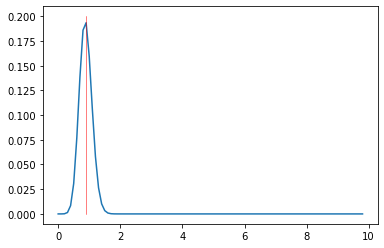

In [67]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot(np.arange(N-1)/np.sqrt(N), a)
plt.plot([1 - 1/np.sqrt(N), 1 - 1/np.sqrt(N)], [0, 0.2], color="r", linewidth=0.5)

In [68]:
expected_value = np.dot(a, np.arange(N-1)/np.sqrt(N))
variance = np.dot(a, np.square((np.arange(N-1)/np.sqrt(N)))) - expected_value**2
print("scaled_equilibrium_point = " + str((np.sqrt(N)-1)/np.sqrt(N)))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

scaled_equilibrium_point = 0.9
expected_value = 0.886443161510376
variance = 0.04141326180095661


In [69]:
N=1000
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

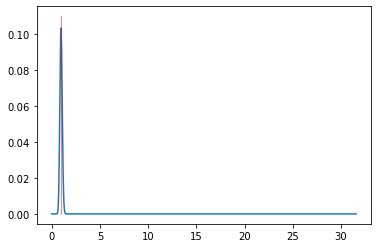

In [70]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot(np.arange(N-1)/np.sqrt(N), a)
plt.plot([1 - 1/np.sqrt(N), 1 - 1/np.sqrt(N)], [0, 0.11], color="r", linewidth=0.5)

In [71]:
expected_value = np.dot(a, np.arange(N-1)/np.sqrt(N))
variance = np.dot(a, np.square((np.arange(N-1)/np.sqrt(N)))) - expected_value**2
print("scaled_equilibrium_point = " + str((np.sqrt(N)-1)/np.sqrt(N)))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

scaled_equilibrium_point = 0.9683772233983162
expected_value = 0.9618222041272897
variance = 0.014863168198112287


In [72]:
N=2000
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()

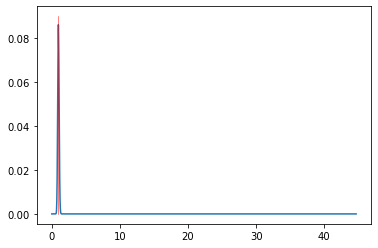

In [73]:
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
plt.plot(np.arange(N-1)/np.sqrt(N), a)
plt.plot([1 - 1/np.sqrt(N), 1 - 1/np.sqrt(N)], [0, 0.09], color="r", linewidth=0.5)

In [74]:
expected_value = np.dot(a, np.arange(N-1)/np.sqrt(N))
variance = np.dot(a, np.square((np.arange(N-1)/np.sqrt(N)))) - expected_value**2
print("scaled_equilibrium_point = " + str((np.sqrt(N)-1)/np.sqrt(N)))
print("expected_value = " + str(expected_value), sep="\n")
print("variance = " + str(variance))

scaled_equilibrium_point = 0.9776393202250021
expected_value = 0.9727409045184665
variance = 0.010699045456308953


In [2]:
def calculated_solution(N):
    solution = np.ones(N-1)
    for i in range(1, N-1):
        s = 1
        for j in range(1, i+1):
            s *= ((N-j)*(N-j-1))/((N-1)*j*j - j)
        solution[i] = s
    solution = solution/sum(solution)
    return solution

In [5]:
for N in [10,100,1000,10000,100000]:
    b = calculated_solution(N)
    expected_value = np.dot(b, np.arange(N-1)/np.sqrt(N))
    variance = np.dot(b, np.square((np.arange(N-1)/np.sqrt(N)))) - expected_value**2
    print("expected_value = " + str(expected_value), sep="\n")
    print("variance = " + str(variance))

expected_value = 0.6405995594056909
variance = 0.08448146932477035
expected_value = 0.8792382397584273
variance = 0.041092469794816844
expected_value = 0.9609246960773231
variance = 0.014849514478516013
expected_value = 0.9875463668078135
variance = 0.00490124606853104
expected_value = 0.9960518241943133
variance = 0.0015711786551413365


In [6]:
b = calculated_solution(100)

<BarContainer object of 20 artists>

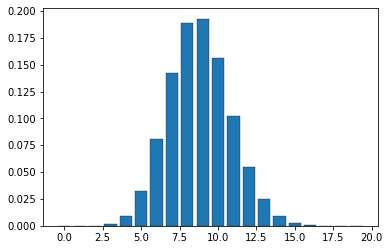

In [18]:
plt.bar(np.arange(20), b[:20], width=0.8, linewidth=0.3, edgecolor="black", label="Gewichte")

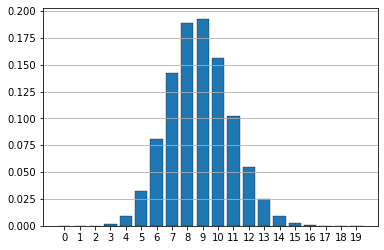

In [29]:
x = np.arange(20)
y = b[:20]
my_xticks = [i for i in range(20)]


fig, ax = plt.subplots(facecolor='white')                                    # create figure and axes objects
plt.bar(x, y, width=0.8, linewidth=0.3, edgecolor="black", label="Gewichte") # make plot
ax.set_xticks(x)                                                             # set x tick positions
ax.set_xticklabels(my_xticks)                                                # set the corresponding x tick labels
ax.grid(axis='y')

In [81]:
N=100
b = calculated_solution(N)
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
max(abs(a - b))

0.00448865127766962

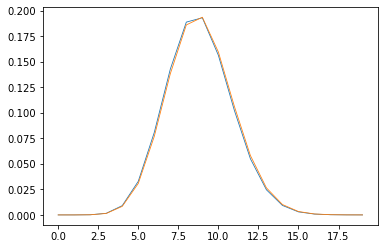

In [86]:
plt.plot(np.arange(N-1)[:20], b[:20], linewidth=0.8)
plt.plot(np.arange(N-1)[:20], a[:20], linewidth=0.8)

In [87]:
N=1000
b = calculated_solution(N)
M = np.array([[transition_prob_relevant_class(i,j,N) for j in range(0,N-1)] for i in range(0, N-1)])
e_values, e_vectors = np.linalg.eig(np.transpose(M))
idx = (np.abs(e_values - 1)).argmin()
a = np.transpose(e_vectors)[idx]
a = np.real_if_close(a, tol=100)
a = a/sum(a)
max(abs(a - b))

0.0004747550974893988

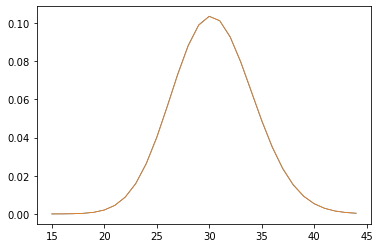

In [90]:
plt.plot(np.arange(N-1)[15:45], b[15:45], linewidth=0.8)
plt.plot(np.arange(N-1)[15:45], a[15:45], linewidth=0.8)